In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
matches=pd.read_csv('IPL Matches 2008-2020.csv')

In [3]:
delivery=pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [5]:
matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [6]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178687 entries, 0 to 178686
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                178687 non-null  int64  
 1   inning            178687 non-null  int64  
 2   over              178687 non-null  int64  
 3   ball              178687 non-null  int64  
 4   batsman           178687 non-null  object 
 5   non_striker       178686 non-null  object 
 6   bowler            178686 non-null  object 
 7   batsman_runs      178686 non-null  float64
 8   extra_runs        178686 non-null  float64
 9   total_runs        178686 non-null  float64
 10  non_boundary      178686 non-null  float64
 11  is_wicket         178686 non-null  float64
 12  dismissal_kind    8810 non-null    object 
 13  player_dismissed  8810 non-null    object 
 14  fielder           6322 non-null    object 
 15  extras_type       9524 non-null    object 
 16  batting_team      17

In [7]:
delivery.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [8]:
matches.shape

(816, 17)

In [9]:
total_score_df=delivery.groupby(['id','inning']).sum()['total_runs'].reset_index()

In [10]:
total_score_df=total_score_df[total_score_df['inning']==1]

In [11]:
match_df=matches.merge(total_score_df[['id','total_runs']],left_on='id',right_on='id')

In [12]:
match_df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,total_runs
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,222.0
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,240.0
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,129.0
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,165.0
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,1178430,Chandigarh,2019-05-05,KL Rahul,"Punjab Cricket Association IS Bindra Stadium, ...",0,Kings XI Punjab,Chennai Super Kings,Kings XI Punjab,field,Kings XI Punjab,wickets,6.0,N,NaN,KN Ananthapadmanabhan,C Shamshuddin,170.0
751,1178431,Mumbai,2019-05-05,HH Pandya,Wankhede Stadium,0,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,Mumbai Indians,wickets,9.0,N,NaN,A Nand Kishore,CK Nandan,133.0
752,1181764,Chennai,2019-05-07,SA Yadav,"MA Chidambaram Stadium, Chepauk",0,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,bat,Mumbai Indians,wickets,6.0,N,NaN,NJ Llong,Nitin Menon,131.0
753,1181766,Visakhapatnam,2019-05-08,RR Pant,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,field,Delhi Capitals,wickets,2.0,N,NaN,BNJ Oxenford,S Ravi,162.0


In [13]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [14]:
teams=['Sunrisers Hyderabad',
       'Mumbai Indians',
       'Royal Challengers Banglore',
       'Kolkata Knight Riders',
       'Punjab Kings',
       'Chennai Super Kings',
       'Rajasthan Royals',
       'Dehli Capitals'
]

# Number of IPL matches won by each team

Text(0.5, 1.0, 'Number of  IPL  matches won by each team')

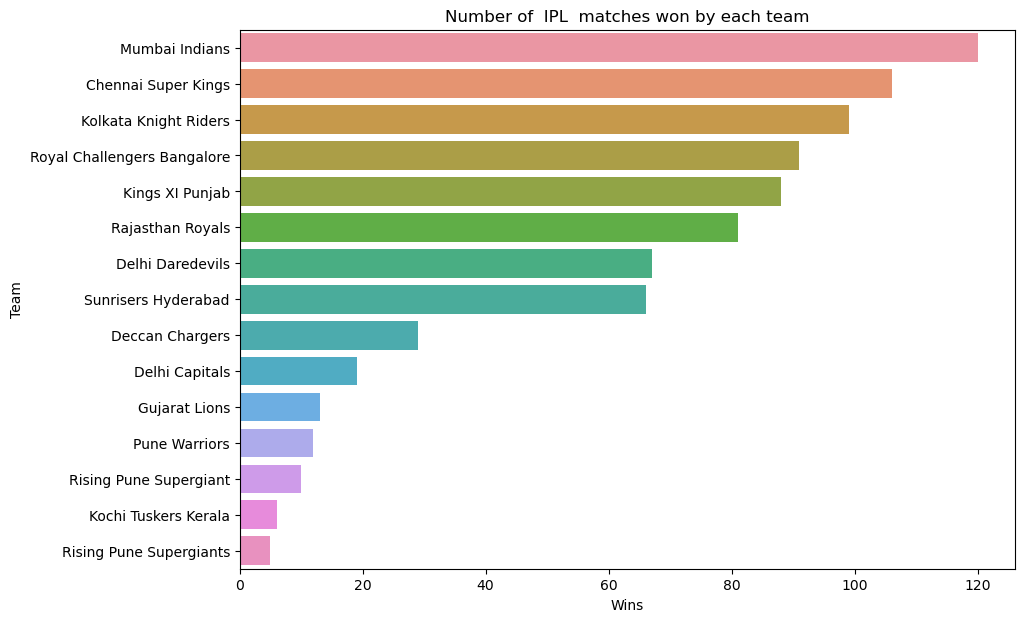

In [15]:
plt.figure(figsize = (10,7))
sns.countplot(y = matches['winner'],data = matches,order= matches['winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of  IPL  matches won by each team')

# Total number of matches played in a different stadium

Text(0.5, 1.0, 'Total Number of matches played in different stadium')

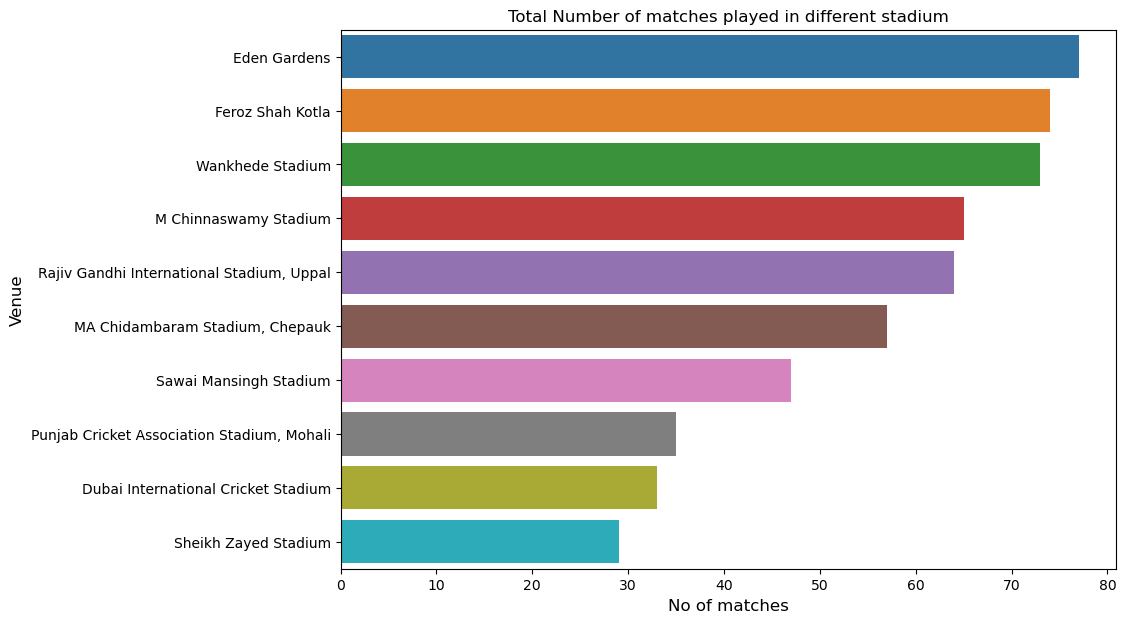

In [16]:
plt.figure(figsize = (10,7))
sns.countplot(y = matches['venue'],data = matches,order = matches['venue'].value_counts().iloc[:10].index)
plt.xlabel('No of matches',fontsize=12)
plt.ylabel('Venue',fontsize=12)
plt.title('Total Number of matches played in different stadium')

In [17]:
match_df['team1']=match_df['team1'].str.replace('Dehli Daredevils','Dehli Capitals')
match_df['team2']=match_df['team2'].str.replace('Dehli Daredevils','Dehli Capitals')

match_df['team1']=match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']=match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['toss_winner']=match_df['toss_winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['toss_winner']=match_df['toss_winner'].str.replace('Dehli Daredevils','Dehli Capitals')

match_df['winner']=match_df['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['winner']=match_df['winner'].str.replace('Dehli Daredevils','Dehli Capitals')

# match_df['bowling_team']=match_df['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
# match_df['bowling_team']=match_df['bowling_team'].str.replace('Dehli Daredevils','Dehli Capitals')

# match_df['batting_team']=match_df['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
# match_df['batting_team']=match_df['batting_team'].str.replace('Dehli Daredevils','Dehli Capitals')


In [18]:
match_df=match_df[match_df['team1'].isin(teams)]
match_df=match_df[match_df['team2'].isin(teams)]

In [19]:
match_df.shape

(225, 18)

In [20]:
match_df=match_df[['id','city','winner','total_runs']]

In [21]:
delivery_df=match_df.merge(delivery,on='id')

In [22]:
delivery_df=delivery_df[delivery_df['inning']==2]

In [23]:
delivery_df.shape

(25985, 21)

In [24]:
delivery_df['current_score']=delivery_df.groupby('id').cumsum()['total_runs_y']

In [25]:
delivery_df['current_score']

0          0.0
1          0.0
2          2.0
3          6.0
4          6.0
         ...  
53813    125.0
53814    125.0
53815    127.0
53816    128.0
53817    132.0
Name: current_score, Length: 25985, dtype: float64

In [26]:
delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']

In [27]:
delivery_df['runs_left']

0        110.0
1        110.0
2        108.0
3        104.0
4        104.0
         ...  
53813      6.0
53814      6.0
53815      4.0
53816      3.0
53817     -1.0
Name: runs_left, Length: 25985, dtype: float64

In [28]:
delivery_df['balls_left']=126-(delivery_df['over']*6-delivery_df['ball'])

In [29]:
delivery_df['balls_left']

0        132
1        121
2        124
3        125
4        122
        ... 
53813     39
53814     48
53815     37
53816     38
53817     40
Name: balls_left, Length: 25985, dtype: int64

In [30]:
delivery_df

,id,city,winner,total_runs_x,inning,over,ball,batsman,non_striker,bowler,...,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,current_score,runs_left,balls_left
0,335986,Kolkata,Kolkata Knight Riders,110.0,2,0,6,WP Saha,BB McCullum,WPUJC Vaas,...,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Deccan Chargers,0.0,110.0,132
1,335986,Kolkata,Kolkata Knight Riders,110.0,2,1,1,BB McCullum,WP Saha,RP Singh,...,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Deccan Chargers,0.0,110.0,121
2,335986,Kolkata,Kolkata Knight Riders,110.0,2,1,4,WP Saha,RT Ponting,RP Singh,...,0.0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Deccan Chargers,2.0,108.0,124
3,335986,Kolkata,Kolkata Knight Riders,110.0,2,1,5,WP Saha,RT Ponting,RP Singh,...,0.0,NaN,NaN,NaN,legbyes,Kolkata Knight Riders,Deccan Chargers,6.0,104.0,125
4,335986,Kolkata,Kolkata Knight Riders,110.0,2,1,2,BB McCullum,WP Saha,RP Singh,...,1.0,caught,BB McCullum,RG Sharma,NaN,Kolkata Knight Riders,Deccan Chargers,6.0,104.0,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53813,1181764,Chennai,Mumbai Indians,131.0,2,15,3,HH Pandya,SA Yadav,Imran Tahir,...,0.0,NaN,NaN,NaN,NaN,Mumbai Indians,Chennai Super Kings,125.0,6.0,39
53814,1181764,Chennai,Mumbai Indians,131.0,2,14,6,HH Pandya,SA Yadav,RA Jadeja,...,0.0,NaN,NaN,NaN,NaN,Mumbai Indians,Chennai Super Kings,125.0,6.0,48
53815,1181764,Chennai,Mumbai Indians,131.0,2,15,1,SA Yadav,HH Pandya,Imran Tahir,...,0.0,NaN,NaN,NaN,NaN,Mumbai Indians,Chennai Super Kings,127.0,4.0,37
53816,1181764,Chennai,Mumbai Indians,131.0,2,15,2,SA Yadav,HH Pandya,Imran Tahir,...,0.0,NaN,NaN,NaN,NaN,Mumbai Indians,Chennai Super Kings,128.0,3.0,38


In [31]:
# fill missing values with 0
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna(0)

# convert to integer
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: 1 if x != 0 else 0)
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

# calculate wickets remaining
wickets = delivery_df.groupby('id')['player_dismissed'].cumsum().values
delivery_df['wickets'] = 10 - wickets
delivery_df['player_dismissed'].unique()

array([0, 1])

In [32]:
delivery_df['wickets'].unique()

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

In [33]:
delivery_df.tail()

,id,city,winner,total_runs_x,inning,over,ball,batsman,non_striker,bowler,...,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,current_score,runs_left,balls_left,wickets
53813,1181764,Chennai,Mumbai Indians,131.0,2,15,3,HH Pandya,SA Yadav,Imran Tahir,...,NaN,0,NaN,NaN,Mumbai Indians,Chennai Super Kings,125.0,6.0,39,6
53814,1181764,Chennai,Mumbai Indians,131.0,2,14,6,HH Pandya,SA Yadav,RA Jadeja,...,NaN,0,NaN,NaN,Mumbai Indians,Chennai Super Kings,125.0,6.0,48,6
53815,1181764,Chennai,Mumbai Indians,131.0,2,15,1,SA Yadav,HH Pandya,Imran Tahir,...,NaN,0,NaN,NaN,Mumbai Indians,Chennai Super Kings,127.0,4.0,37,6
53816,1181764,Chennai,Mumbai Indians,131.0,2,15,2,SA Yadav,HH Pandya,Imran Tahir,...,NaN,0,NaN,NaN,Mumbai Indians,Chennai Super Kings,128.0,3.0,38,6
53817,1181764,Chennai,Mumbai Indians,131.0,2,15,4,HH Pandya,SA Yadav,Imran Tahir,...,NaN,0,NaN,NaN,Mumbai Indians,Chennai Super Kings,132.0,-1.0,40,6


In [34]:
#crr=runs/overs
delivery_df['crr']=(delivery_df['current_score']*6)/(120-delivery_df['balls_left'])
delivery_df['crr']

0        -0.000000
1        -0.000000
2        -3.000000
3        -7.200000
4       -18.000000
           ...    
53813     9.259259
53814    10.416667
53815     9.180723
53816     9.365854
53817     9.900000
Name: crr, Length: 25985, dtype: float64

In [35]:
delivery_df['rrr']=delivery_df['runs_left']*6/delivery_df['balls_left']

In [36]:
def result(row):
  return 1 if row['batting_team']==row['winner']  else 0

In [37]:
delivery_df['result']=delivery_df.apply(result,axis=1)

In [38]:
final_df=delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [39]:
final_df.sample(final_df.shape[0])

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
16616,Deccan Chargers,Kolkata Knight Riders,Hyderabad,166.0,19,10,169.0,0.178218,52.421053,0
4322,Chennai Super Kings,Deccan Chargers,Hyderabad,127.0,111,9,147.0,13.333333,6.864865,1
23449,Kolkata Knight Riders,Chennai Super Kings,Chennai,152.0,104,9,190.0,14.250000,8.769231,1
41749,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata,117.0,90,9,172.0,11.000000,7.800000,0
12507,Deccan Chargers,Rajasthan Royals,Nagpur,74.0,20,5,159.0,5.100000,22.200000,0
...,...,...,...,...,...,...,...,...,...,...
31282,Kolkata Knight Riders,Chennai Super Kings,Ranchi,65.0,91,2,148.0,17.172414,4.285714,0
18610,Mumbai Indians,Chennai Super Kings,Chennai,57.0,73,7,112.0,7.021277,4.684932,1
33259,Rajasthan Royals,Mumbai Indians,Ahmedabad,43.0,22,3,178.0,8.265306,11.727273,0
4161,Rajasthan Royals,Mumbai Indians,Jaipur,123.0,109,9,145.0,12.000000,6.770642,1


In [40]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [41]:
delivery_df['crr']

0        -0.000000
1        -0.000000
2        -3.000000
3        -7.200000
4       -18.000000
           ...    
53813     9.259259
53814    10.416667
53815     9.180723
53816     9.365854
53817     9.900000
Name: crr, Length: 25985, dtype: float64

In [42]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [43]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [44]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [45]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [46]:
final_df = final_df.sample(final_df.shape[0])

In [47]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
8368,Chennai Super Kings,Mumbai Indians,Port Elizabeth,17.0,76,8,147.0,17.727273,1.342105,1


In [48]:
#Checking null values
final_df.isnull().sum()

batting_team      0
bowling_team      0
city            481
runs_left         0
balls_left        0
wickets           0
total_runs_x      0
crr               0
rrr               0
result            0
dtype: int64

In [49]:
final_df.dropna(inplace=True)

In [50]:
final_df = final_df[final_df['balls_left'] != 0]

In [51]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [52]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
23731,Chennai Super Kings,Mumbai Indians,Chennai,80.0,78,6,148.0,9.714286,6.153846
40668,Mumbai Indians,Sunrisers Hyderabad,Visakhapatnam,100.0,118,0,177.0,231.000000,5.084746
26895,Kolkata Knight Riders,Mumbai Indians,Mumbai,97.0,39,4,170.0,5.407407,14.923077
21343,Deccan Chargers,Chennai Super Kings,Chennai,35.0,82,7,160.0,19.736842,2.560976
10364,Kolkata Knight Riders,Rajasthan Royals,Ahmedabad,50.0,62,5,168.0,12.206897,4.838710
...,...,...,...,...,...,...,...,...,...
6635,Kolkata Knight Riders,Mumbai Indians,East London,78.0,45,10,148.0,5.600000,10.400000
9802,Chennai Super Kings,Deccan Chargers,Chennai,128.0,56,7,190.0,5.812500,13.714286
19162,Kolkata Knight Riders,Rajasthan Royals,Jaipur,58.0,35,3,164.0,7.482353,9.942857
14859,Rajasthan Royals,Deccan Chargers,Hyderabad,100.0,69,9,137.0,4.352941,8.695652


In [53]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [54]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
0,Chennai Super Kings,Mumbai Indians,Chennai,80.0,78,6,148.0,9.714286,6.153846
1,Mumbai Indians,Sunrisers Hyderabad,Visakhapatnam,100.0,118,0,177.0,231.000000,5.084746
2,Kolkata Knight Riders,Mumbai Indians,Mumbai,97.0,39,4,170.0,5.407407,14.923077
3,Deccan Chargers,Chennai Super Kings,Chennai,35.0,82,7,160.0,19.736842,2.560976
4,Kolkata Knight Riders,Rajasthan Royals,Ahmedabad,50.0,62,5,168.0,12.206897,4.838710
...,...,...,...,...,...,...,...,...,...
20398,Kolkata Knight Riders,Mumbai Indians,East London,78.0,45,10,148.0,5.600000,10.400000
20399,Chennai Super Kings,Deccan Chargers,Chennai,128.0,56,7,190.0,5.812500,13.714286
20400,Kolkata Knight Riders,Rajasthan Royals,Jaipur,58.0,35,3,164.0,7.482353,9.942857
20401,Rajasthan Royals,Deccan Chargers,Hyderabad,100.0,69,9,137.0,4.352941,8.695652


In [55]:
X_train.describe()

,runs_left,balls_left,wickets,total_runs_x,crr,rrr
count,20403.000000,20403.000000,20403.000000,20403.000000,20403.000000,20403.000000
mean,86.953046,76.172083,7.147772,160.968779,9.865441,8.675889
std,48.999055,33.431379,2.454182,26.354105,71.385397,7.894527
min,-6.000000,13.000000,0.000000,67.000000,-984.000000,-2.769231
25%,47.000000,48.000000,6.000000,142.000000,3.409091,3.802172
50%,87.000000,77.000000,8.000000,162.000000,8.000000,7.028571
75%,124.000000,105.000000,9.000000,178.000000,15.101724,11.040000
max,246.000000,135.000000,10.000000,246.000000,1026.000000,90.000000


In [56]:
X_test.describe()

,runs_left,balls_left,wickets,total_runs_x,crr,rrr
count,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000
mean,86.448147,75.738287,7.121741,161.103705,inf,8.725969
std,48.601427,33.498445,2.449065,27.061731,NaN,7.913402
min,-6.000000,13.000000,0.000000,67.000000,-1020.000000,-1.714286
25%,47.000000,47.000000,6.000000,142.000000,3.658537,3.813084
50%,86.000000,77.000000,8.000000,163.000000,8.155340,6.988235
75%,124.000000,105.000000,9.000000,178.000000,15.658537,11.210526
max,232.000000,134.000000,10.000000,246.000000,inf,79.384615


In [57]:
X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first',handle_unknown='error'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [60]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [61]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [62]:
y_pred = pipe.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8798274848069007

In [64]:
pipe.predict_proba(X_test)[11]

array([0.94397937, 0.05602063])

In [65]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Banglore',
 'Kolkata Knight Riders',
 'Punjab Kings',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Dehli Capitals']

In [66]:
delivery_df['city'].unique()

array(['Kolkata', 'Chennai', 'Hyderabad', 'Mumbai', 'Jaipur', 'Cape Town',
       'Durban', 'Port Elizabeth', 'Centurion', 'East London',
       'Kimberley', 'Johannesburg', 'Ahmedabad', 'Nagpur',
       'Visakhapatnam', 'Cuttack', 'Bangalore', 'Delhi', 'Abu Dhabi', nan,
       'Ranchi', 'Pune'], dtype=object)

In [67]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))